In [1]:
%matplotlib inline
from matplotlib import style
from matplotlib.ticker import MultipleLocator
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()
#engine.execute('SELECT * FROM station LIMIT 10').fetchall()

In [10]:
m_cols = inspector.get_columns('measurement')
for c in m_cols:
    print(c['name'], c['type'])

s_cols = inspector.get_columns('station')
for c in s_cols:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
#print(date_prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
dp_df = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
dp_df = dp_df.sort_values(by=['Date'])
dp2 = pd.DataFrame(dp_df)
dp2.reset_index(inplace=True)

In [12]:
dp2 = dp2.drop(columns='index')
dp2

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [13]:
dp2['Date'] = pd.to_datetime(dp2['Date'].str.strip())

In [14]:
dp2.dtypes

Date             datetime64[ns]
Precipitation           float64
dtype: object

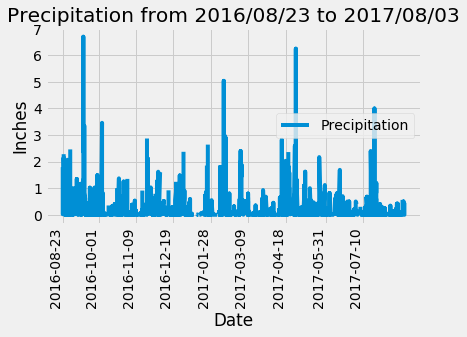

<Figure size 36000x3600 with 0 Axes>

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
dp2.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation from 2016/08/23 to 2017/08/03')
plt.xticks(['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31',
            '2017-07-10'])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.figure(figsize=(500,50))
plt.show()